## DEBUG

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import logging
import matplotlib.pyplot as plt
import numpy as np

from pkg import c, m, f 
import torch
import logging
from pkg import c, m, f 


In [2]:
# Config
cfg = {
    'batch_size': 5,
    'threshold_value': 10,
    'num_epochs': 10,
    'learning_rate': 0.001,
    'classes': 2
}

# classes 
paths = c.PathManager()
data = c.PeakImageDataset(paths)
prep = c.DataPreparation(paths, data, batch_size=cfg['batch_size'])
water_h5 = data.load_h5(paths.water_background_h5)
ip = c.ImageProcessor(water_h5)
p = c.PeakThresholdProcessor(threshold_value=cfg['threshold_value'])

# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(torch.cuda.is_available())



Number of peak images: 20
Number of water images: 20
Number of label images: 20
<class 'numpy.ndarray'>
False


In [3]:
# if not already generated 
# ip.process_directory(paths, p.threshold_value) 
print(dir(m))

['BasicCNN1', 'BasicCNN2', 'DenseNet121_Weights', 'DenseNetBraggPeakClassifier', 'F', 'ResNet50BraggPeakClassifier', 'ResNet50_Weights', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'models', 'nn', 'np', 'optim', 'os', 'torch']


Criterion:  BCEWithLogitsLoss()
Optimizer: 
 Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
Learning rate:  0.001
Data prepared.
Train size: 16
Test size: 4
Batch size: 1
Number of batches in train_loader: 16 


Model: BasicCNN1
Training and testing the model...
-- epoch 0
loss (train, test): 0.6528, 0.6222
accuracy (train, test): 0.9999, 1.0000
-- epoch 1
loss (train, test): 0.5931, 0.5581
accuracy (train, test): 1.0000, 1.0000


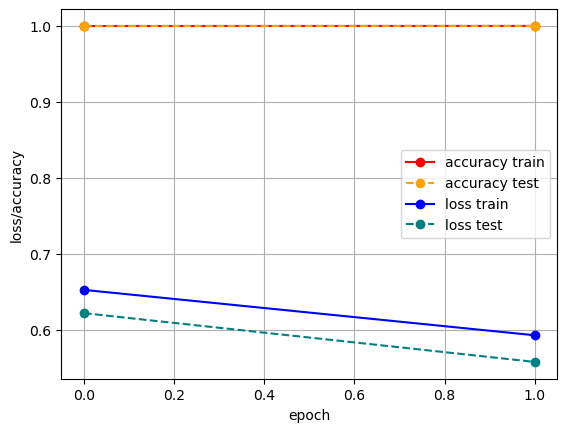

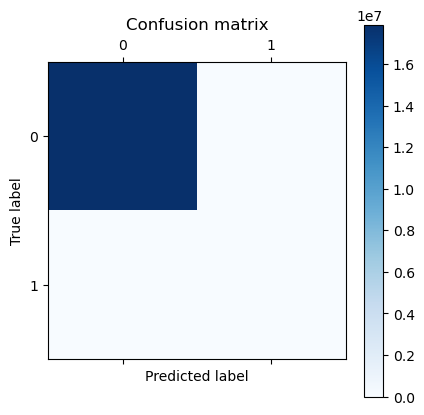

Criterion:  BCEWithLogitsLoss()
Optimizer: 
 Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
Learning rate:  0.001
Data prepared.
Train size: 16
Test size: 4
Batch size: 1
Number of batches in train_loader: 16 


Model: BasicCNN2
Training and testing the model...
-- epoch 0


KeyboardInterrupt: 

In [4]:
models = [
    m.BasicCNN1(),
    m.BasicCNN2(),
    m.ResNet50BraggPeakClassifier(),
    m.DenseNetBraggPeakClassifier()
]

for i in models:
    model = i.to(device)
    # loss function/ combines a Sigmoid layer and the BCELoss in one single class
    criterion = nn.BCEWithLogitsLoss()
    # optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=cfg['learning_rate'])
    print("Criterion: ", criterion)
    print("Optimizer: \n", optimizer)
    print("Learning rate: ", optimizer.param_groups[0]['lr'])
    # data loaders 
    train_loader, test_loader = prep.prep_data()
    loader = [train_loader, test_loader]
    N = [len(loader[0].dataset), len(loader[1].dataset)]

    epochs = cfg['num_epochs']
    batch = [len(loader[0]), len(loader[1])]
    classes = cfg['classes']

    f.train_test_model(model, loader, criterion, optimizer, epochs, device, N, batch, classes)